**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: LUIS ANGEL SEDA MARCOS
*   MATRÍCULA: A01795301

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
#os.chdir(DIR)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas? 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Cuantitativas

 0   person_age  
 1   person_inco  
 3   person_emp_length 
 6   loan_amnt    
 7   loan_int_rate  
 8   loan_status 
 9   loan_percent_income  
 11  cb_person_cred_hist_length 

Cualitativas
 
 2   person_home_ownership 
 4   loan_intent            
 5   loan_grade             
 10  cb_person_default_on_file   

 2. Determina el porcentaje de valores faltantes por columna.

In [8]:
df_null_percent = ((df.isnull().sum() / len(df))*100)
print(df_null_percent)

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


In [9]:
df_null_percent = df.isnull().sum().sort_values(ascending=False)
print(df_null_percent)

loan_int_rate                 3116
person_emp_length              895
person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis 
   
**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%) 

In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
df.std(numeric_only= True)

person_age                        6.348078
person_income                 61983.119168
person_emp_length                 4.142630
loan_amnt                      6322.086646
loan_int_rate                     3.240459
loan_status                       0.413006
loan_percent_income               0.106782
cb_person_cred_hist_length        4.055001
dtype: float64

In [13]:
df.var(numeric_only= True)

person_age                    4.029810e+01
person_income                 3.841907e+09
person_emp_length             1.716138e+01
loan_amnt                     3.996878e+07
loan_int_rate                 1.050058e+01
loan_status                   1.705737e-01
loan_percent_income           1.140234e-02
cb_person_cred_hist_length    1.644303e+01
dtype: float64

In [14]:
df.skew(numeric_only= True)

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [15]:
df.kurt(numeric_only= True)

person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable. 
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.
 
**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma. 

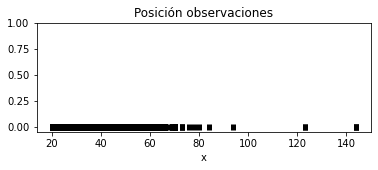

In [18]:
#person_age
X = df['person_age']
fig, ax = plt.subplots(figsize=(6,2))
ax.plot(X, np.full_like(X, 0.05), '|k', markeredgewidth=5)
ax.set_ylim(-0.05,1)
ax.set_title('Posición observaciones')
ax.set_xlabel('x')
ax.set_ylabel('');

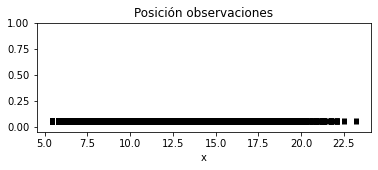

In [21]:
#loan_in_rate
X = df['loan_int_rate']
fig, ax = plt.subplots(figsize=(6,2))
ax.plot(X, np.full_like(X, 0.05), '|k', markeredgewidth=5)
ax.set_ylim(-0.05,1)
ax.set_title('Posición observaciones')
ax.set_xlabel('x')
ax.set_ylabel('');

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles. 

In [ ]:
 #   person_age  
 #   person_inco  
 #   person_emp_length 
 #   loan_amnt    
 #   loan_int_rate  
 #   loan_status 
 #   loan_percent_income  
 #  cb_person_cred_hist_length

{'whiskers': [<matplotlib.lines.Line2D at 0x17e527dc9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17e527dcf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e527dc700>],
 'medians': [<matplotlib.lines.Line2D at 0x17e527e8550>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e527e8af0>],
 'means': [<matplotlib.lines.Line2D at 0x17e527e8820>]}

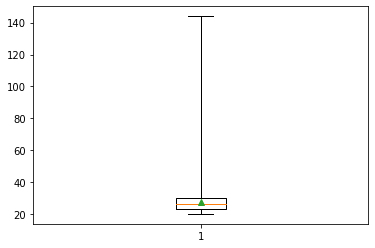

In [30]:
person_age  = df['person_age']
plt.boxplot(person_age, showmeans=True, whis = 50)

{'whiskers': [<matplotlib.lines.Line2D at 0x17e52c09e50>,
 'caps': [<matplotlib.lines.Line2D at 0x17e52c19430>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e52c09b80>],
 'medians': [<matplotlib.lines.Line2D at 0x17e52c199d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e52c19f70>],
 'means': [<matplotlib.lines.Line2D at 0x17e52c19ca0>]}

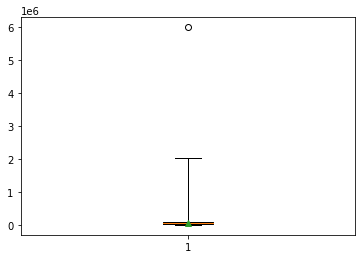

In [41]:
person_income = df['person_income'] 
plt.boxplot(person_income, showmeans=True, whis = 99)

{'whiskers': [<matplotlib.lines.Line2D at 0x17e528b0be0>,
 'caps': [<matplotlib.lines.Line2D at 0x17e528bd1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e528b0910>],
 'medians': [<matplotlib.lines.Line2D at 0x17e528bd760>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e528bdd00>],
 'means': [<matplotlib.lines.Line2D at 0x17e528bda30>]}

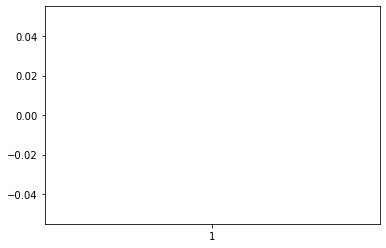

In [32]:
person_emp_length = df['person_emp_length']
plt.boxplot(person_emp_length, showmeans=True, whis = 50)

{'whiskers': [<matplotlib.lines.Line2D at 0x17e528e1b50>,
 'caps': [<matplotlib.lines.Line2D at 0x17e528e9130>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e528e1880>],
 'medians': [<matplotlib.lines.Line2D at 0x17e528e96d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e528e9c70>],
 'means': [<matplotlib.lines.Line2D at 0x17e528e99a0>]}

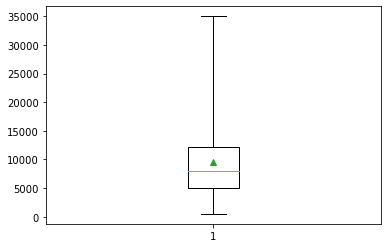

In [33]:
loan_amnt = df['loan_amnt']   
plt.boxplot(loan_amnt, showmeans=True, whis = 50)

{'whiskers': [<matplotlib.lines.Line2D at 0x17e5293b340>,
 'caps': [<matplotlib.lines.Line2D at 0x17e5293b8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e5293b070>],
 'medians': [<matplotlib.lines.Line2D at 0x17e5293be80>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e52949460>],
 'means': [<matplotlib.lines.Line2D at 0x17e52949190>]}

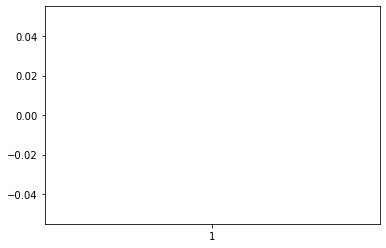

In [34]:
loan_int_rate = df['loan_int_rate'] 
plt.boxplot(loan_int_rate, showmeans=True, whis = 50)

{'whiskers': [<matplotlib.lines.Line2D at 0x17e52994af0>,
 'caps': [<matplotlib.lines.Line2D at 0x17e529a20d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e52994820>],
 'medians': [<matplotlib.lines.Line2D at 0x17e529a2670>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e529a2c10>],
 'means': [<matplotlib.lines.Line2D at 0x17e529a2940>]}

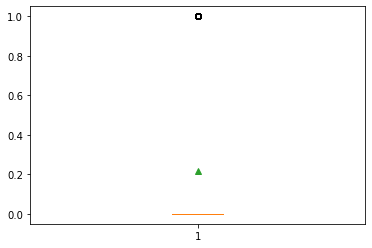

In [35]:
loan_status = df['loan_status']
plt.boxplot(loan_status, showmeans=True, whis = 50)

{'whiskers': [<matplotlib.lines.Line2D at 0x17e52a79850>,
 'caps': [<matplotlib.lines.Line2D at 0x17e52a79df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e52a79580>],
 'medians': [<matplotlib.lines.Line2D at 0x17e52a883d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e52a88970>],
 'means': [<matplotlib.lines.Line2D at 0x17e52a886a0>]}

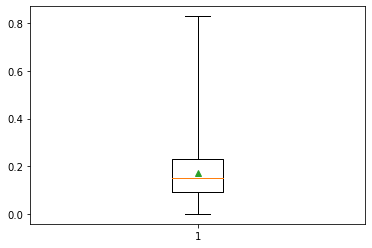

In [36]:
loan_percent_income  = df['loan_percent_income']
plt.boxplot(loan_percent_income, showmeans=True, whis = 50)

{'whiskers': [<matplotlib.lines.Line2D at 0x17e52adf5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x17e52adfb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e52adf2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x17e52aeb130>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e52aeb6d0>],
 'means': [<matplotlib.lines.Line2D at 0x17e52aeb400>]}

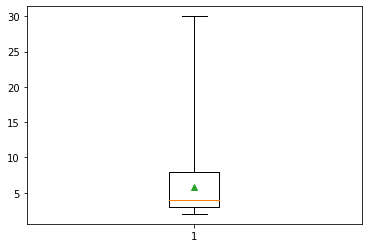

In [37]:
cb_person_cred_hist_length= df['cb_person_cred_hist_length']
plt.boxplot(cb_person_cred_hist_length, showmeans=True, whis = 50)

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [42]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)
   
**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()` 

In [44]:
#person_home_ownership,loan_intent,loan_grade

In [45]:
df['person_home_ownership'].describe()

count     32581
unique        4
top        RENT
freq      16446
Name: person_home_ownership, dtype: object

In [46]:
df["person_home_ownership"].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [47]:
df['loan_intent'].describe()

count         32581
unique            6
top       EDUCATION
freq           6453
Name: loan_intent, dtype: object

In [48]:
df["loan_intent"].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [49]:
df['loan_grade'].describe()

count     32581
unique        7
top           A
freq      10777
Name: loan_grade, dtype: object

In [50]:
df["loan_grade"].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df) `

<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

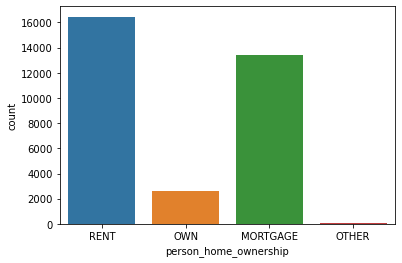

In [51]:
sns.countplot(x = "person_home_ownership", data = df)

<AxesSubplot:xlabel='loan_intent', ylabel='count'>

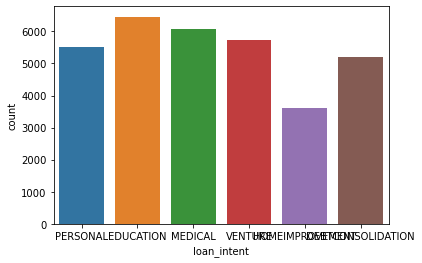

In [52]:
sns.countplot(x = "loan_intent", data = df)

<AxesSubplot:xlabel='loan_grade', ylabel='count'>

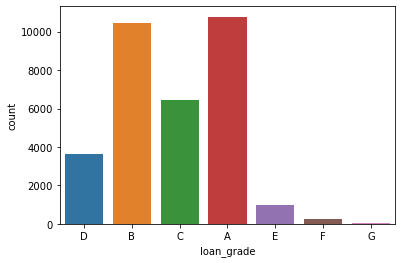

In [53]:
sns.countplot(x = "loan_grade", data = df)

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos: 

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `load_status`. Interpreta el resultado.	

<AxesSubplot:xlabel='loan_status', ylabel='loan_percent_income'>

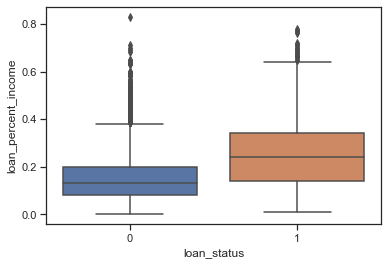

In [64]:
sns.boxplot(x="loan_status", y="loan_percent_income",data=df)

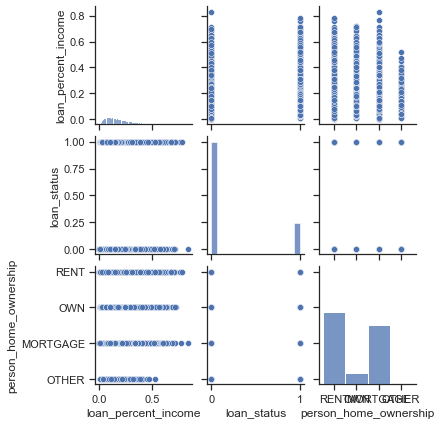

In [67]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = [ 'loan_percent_income','loan_status','person_home_ownership'])
plt.show()

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

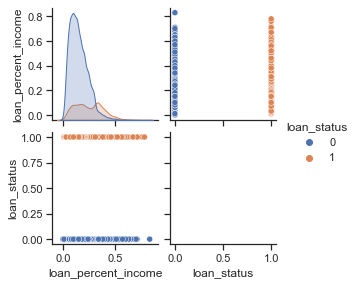

In [75]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = [ 'loan_percent_income','loan_status'], hue='loan_status')
plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

In [76]:
correlation = df.corr(method='pearson')
correlation

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


<AxesSubplot:>

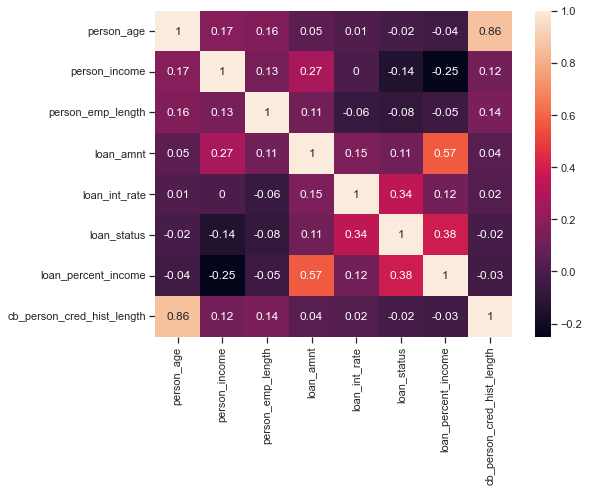

In [78]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(round(correlation,2), annot=True)